In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

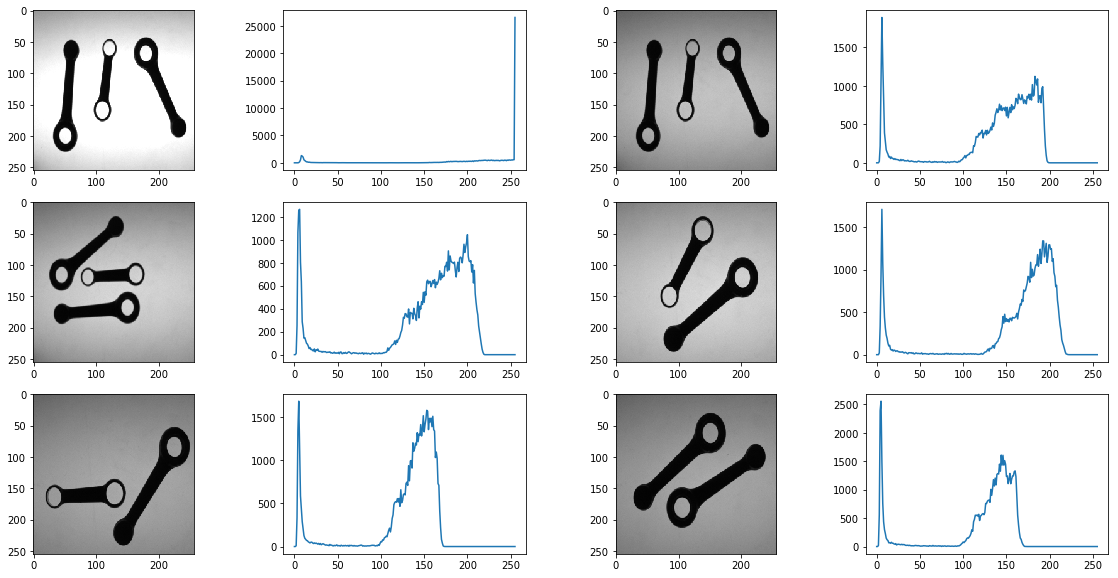

In [2]:
DIRECTORY = './'
suffixes = ['00','01','12','21','31','33']
first_task_img_names = list(map(lambda suffix: 'TESI'+suffix+'.BMP' , suffixes))


first_task_img_colored = [cv.imread(name) for name in first_task_img_names]
first_task_img = [cv.cvtColor(im, cv.COLOR_BGR2GRAY) for im in first_task_img_colored]
figure, axes = plt.subplots(3,4, figsize=[20,10])
axes[0,0].imshow(first_task_img[0], cmap='gray',vmin=0, vmax=255)
hist, _ = np.histogram(first_task_img[0],256,[0,256])
axes[0,1].plot(hist)

axes[0,2].imshow(first_task_img[1], cmap='gray',vmin=0, vmax=255)
hist, _ = np.histogram(first_task_img[1],256,[0,256])
axes[0,3].plot(hist)

axes[1,0].imshow(first_task_img[2], cmap='gray',vmin=0, vmax=255)
hist, _ = np.histogram(first_task_img[2],256,[0,256])
axes[1,1].plot(hist)

axes[1,2].imshow(first_task_img[3], cmap='gray',vmin=0, vmax=255)
hist, _ = np.histogram(first_task_img[3],256,[0,256])
axes[1,3].plot(hist)

axes[2,0].imshow(first_task_img[4], cmap='gray',vmin=0, vmax=255)
hist, _ = np.histogram(first_task_img[4],256,[0,256])
axes[2,1].plot(hist)

axes[2,2].imshow(first_task_img[5], cmap='gray',vmin=0, vmax=255)
hist, _ = np.histogram(first_task_img[5],256,[0,256])
axes[2,3].plot(hist)
plt.show()

The histograms are **bimodal**, so we let otsu's algorithm choose the most appropriate threshold depending on intensity distribution.

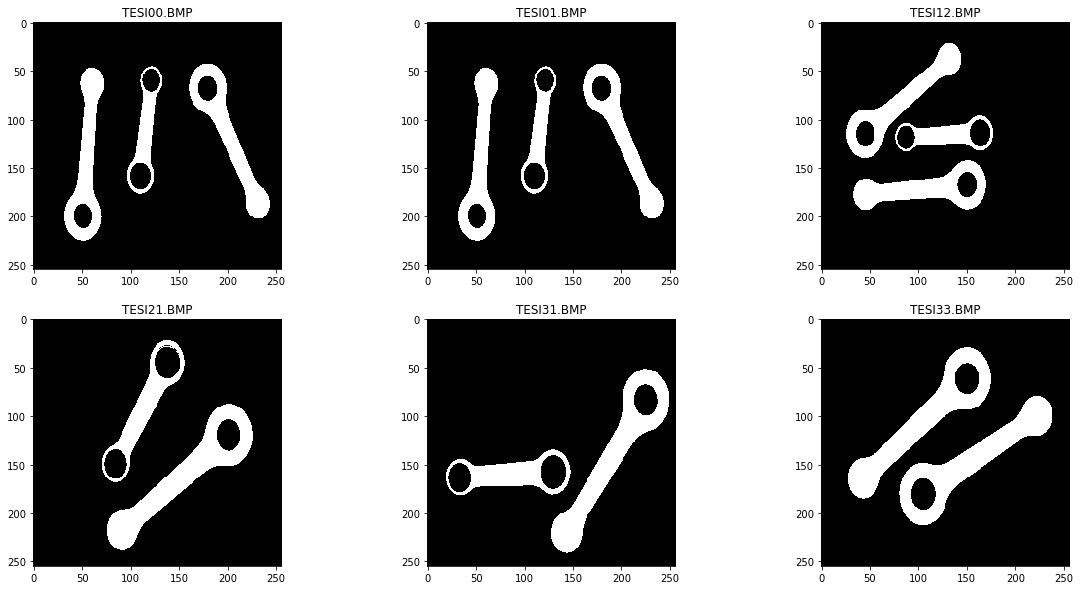

In [3]:
figure, axes = plt.subplots(2,3, figsize=[20,10])
ret1, th1 = cv.threshold(first_task_img[0],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret2, th2 = cv.threshold(first_task_img[1],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret3, th3 = cv.threshold(first_task_img[2],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret4, th4 = cv.threshold(first_task_img[3],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret5, th5 = cv.threshold(first_task_img[4],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret6, th6 = cv.threshold(first_task_img[5],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
axes[0,0].imshow(th1, cmap='gray',vmin=0,vmax=255)
axes[0,0].set_title(first_task_img_names[0])
axes[0,1].imshow(th2, cmap='gray',vmin=0,vmax=255)
axes[0,1].set_title(first_task_img_names[1])
axes[0,2].imshow(th3, cmap='gray',vmin=0,vmax=255)
axes[0,2].set_title(first_task_img_names[2])
axes[1,0].imshow(th4, cmap='gray',vmin=0,vmax=255)
axes[1,0].set_title(first_task_img_names[3])
axes[1,1].imshow(th5, cmap='gray',vmin=0,vmax=255)
axes[1,1].set_title(first_task_img_names[4])
axes[1,2].imshow(th6, cmap='gray',vmin=0,vmax=255)
axes[1,2].set_title(first_task_img_names[5])
plt.show()

TESI21.BMP: one of the rods has some small holes on the bigger end. Close it with morphological transformation.

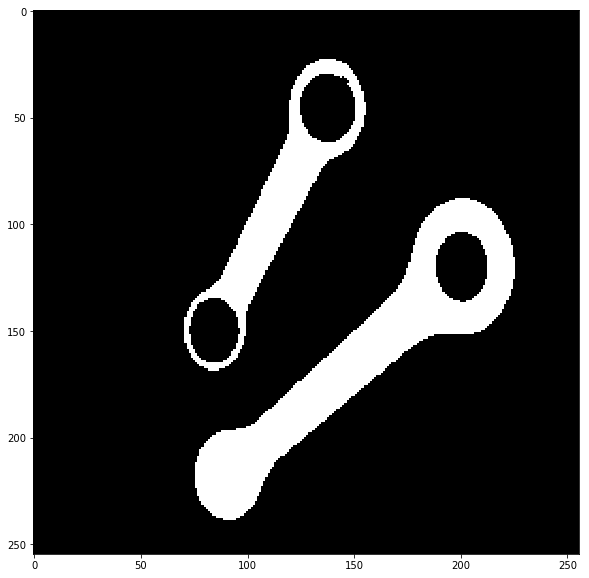

In [4]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
th4 = cv.morphologyEx(th4, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=[20,10])
plt.imshow(th4, cmap='gray', vmin=0, vmax=255)
plt.show()

Processing noisy images. We use bilateral filtering, since there are some very thin edges, so we don't risk eliminating the edges alongside the noise. Testing with other filters and morphological operators proved that one way or another little parts of edges get removed in the process of denoising.

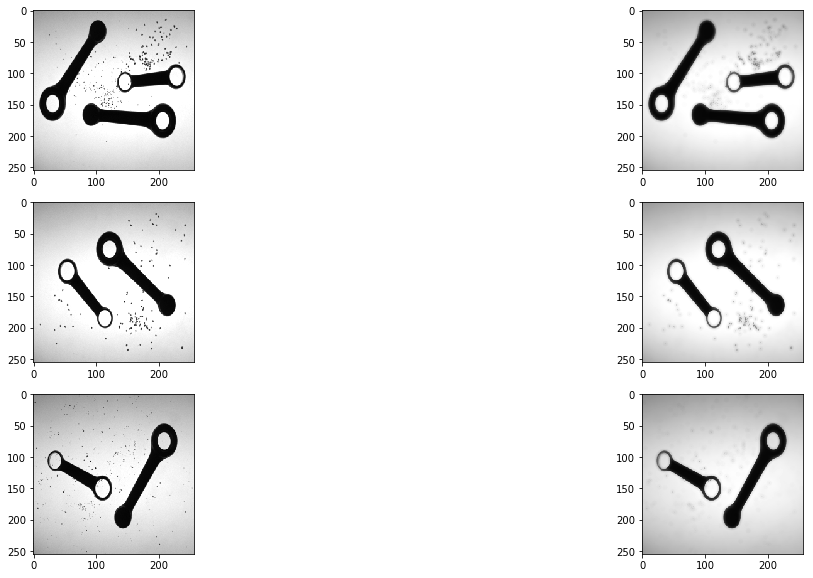

In [70]:
suffixes = ['92','90','98']
noisy_img_names = list(map(lambda suffix: 'TESI'+suffix+'.BMP' , suffixes))

noisy_img_colored = [cv.imread(name) for name in noisy_img_names]
noisy_img = [cv.cvtColor(im, cv.COLOR_BGR2GRAY) for im in noisy_img_colored]

figure, axes = plt.subplots(3,2,figsize=[20,10])
axes[0,0].imshow(noisy_img[0], cmap='gray',vmin=0, vmax=255)
denoised1 = cv.bilateralFilter(noisy_img[0],9,130,75)
axes[0,1].imshow(denoised1, cmap='gray',vmin=0, vmax=255)

axes[1,0].imshow(noisy_img[1], cmap='gray',vmin=0, vmax=255)
denoised2 = cv.bilateralFilter(noisy_img[1],9,110,75)
axes[1,1].imshow(denoised2, cmap='gray',vmin=0, vmax=255)

axes[2,0].imshow(noisy_img[2], cmap='gray',vmin=0, vmax=255)
denoised3 = cv.bilateralFilter(noisy_img[2],9,110,75)
axes[2,1].imshow(denoised3, cmap='gray',vmin=0, vmax=255)

plt.show()

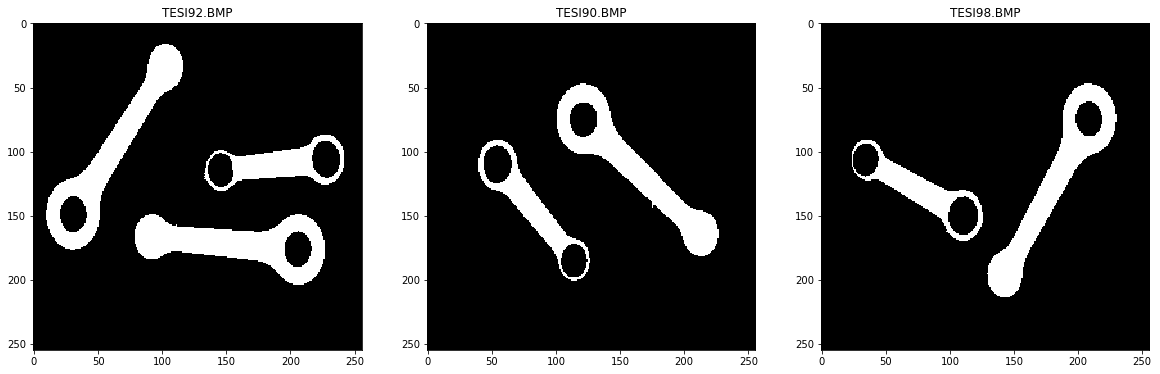

In [71]:
figure, axes = plt.subplots(1,3, figsize=[20,10])
ret1, denoised1 = cv.threshold(denoised1,0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret2, denoised2 = cv.threshold(denoised2,0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret3, denoised3 = cv.threshold(denoised3,0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)

axes[0].imshow(denoised1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(noisy_img_names[0])
axes[1].imshow(denoised2, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(noisy_img_names[1])
axes[2].imshow(denoised3, cmap='gray', vmin=0, vmax=255)
axes[2].set_title(noisy_img_names[2])
plt.show()

Now, deal with images with distractors. For an object to qualify as a rod, it has to present at least a hole, and be elongated. So it is not a rod when it is not elongated or it doesn't have holes: to detect absence of holes, just check the *first_child* hierarchy's field of the top level contours; to check for elongatedness, need to compute the bounding rectangle to get width and length, and if $\frac{Width}{Length} \approx 1$ then it's not elongated, it resembles a circle. These checks are done in the *compute_holes* function, during hierachy and contour processing.

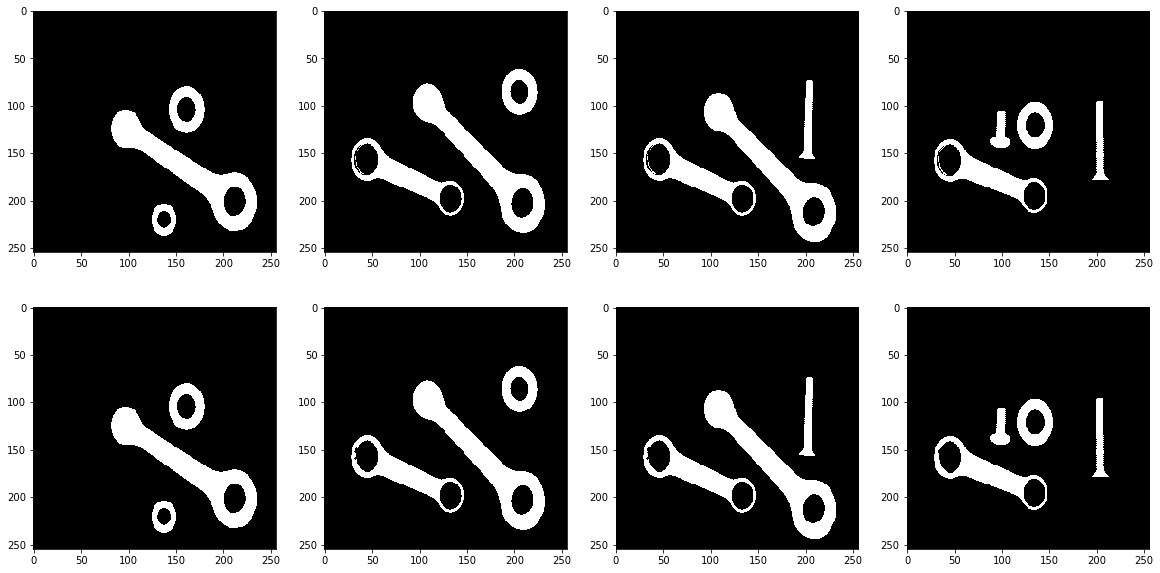

In [7]:
suffixes = ['44','47','48', '49']
distractor_img_names = list(map(lambda suffix: 'TESI' + suffix + '.BMP' , suffixes))

distractor_img_colored = [cv.imread(name) for name in distractor_img_names]
distractor_img = [cv.cvtColor(im, cv.COLOR_BGR2GRAY) for im in distractor_img_colored]
figure, axes = plt.subplots(2,4, figsize=[20,10])
ret1, distractor1 = cv.threshold(distractor_img[0],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret2, distractor2 = cv.threshold(distractor_img[1],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret3, distractor3 = cv.threshold(distractor_img[2],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
ret4, distractor4 = cv.threshold(distractor_img[3],0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)

axes[0,0].imshow(distractor1, cmap='gray', vmin=0, vmax=255)
axes[0,1].imshow(distractor2, cmap='gray', vmin=0, vmax=255)
axes[0,2].imshow(distractor3, cmap='gray', vmin=0, vmax=255)
axes[0,3].imshow(distractor4, cmap='gray', vmin=0, vmax=255)

# perform closing to avoid finding false contours in holes
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
distractor2 = cv.morphologyEx(distractor2, cv.MORPH_CLOSE, kernel)
distractor3 = cv.morphologyEx(distractor3, cv.MORPH_CLOSE, kernel)
distractor4 = cv.morphologyEx(distractor4, cv.MORPH_CLOSE, kernel)
axes[1,0].imshow(distractor1, cmap='gray', vmin=0, vmax=255)
axes[1,1].imshow(distractor2, cmap='gray', vmin=0, vmax=255)
axes[1,2].imshow(distractor3, cmap='gray', vmin=0, vmax=255)
axes[1,3].imshow(distractor4, cmap='gray', vmin=0, vmax=255)
plt.show()

Compute the contours for each image. Each contour has a hierarchy that tells whether it is the border of a connected component or not: in our case, a rod will have no parent contour. Then, record every feature that can be computed from the contours in *image_features*.

Rods of type A have one hole, type B two holes. So while visiting the contours, detect the inner contours and count the number, and then record it in the *hole* property of the *images_features* dictionary.

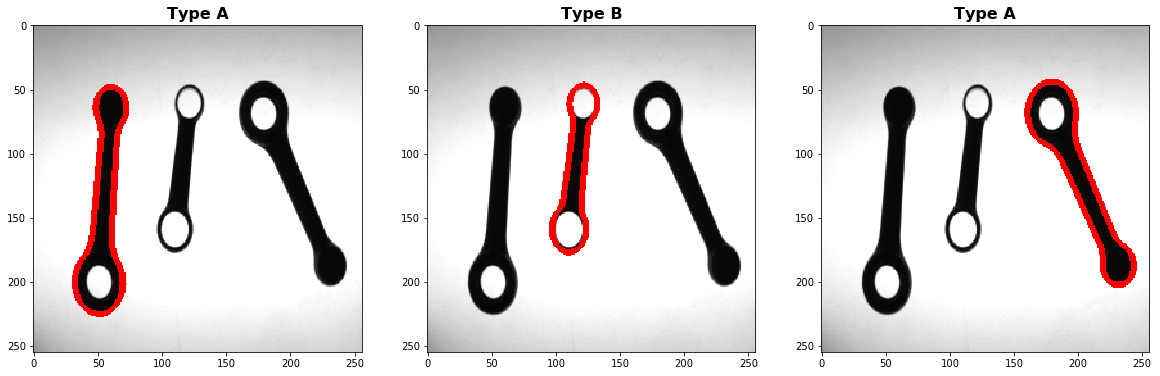

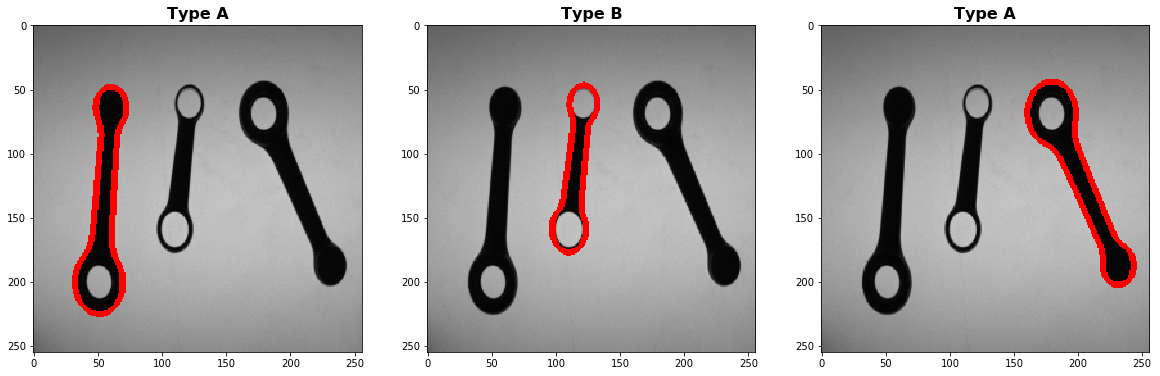

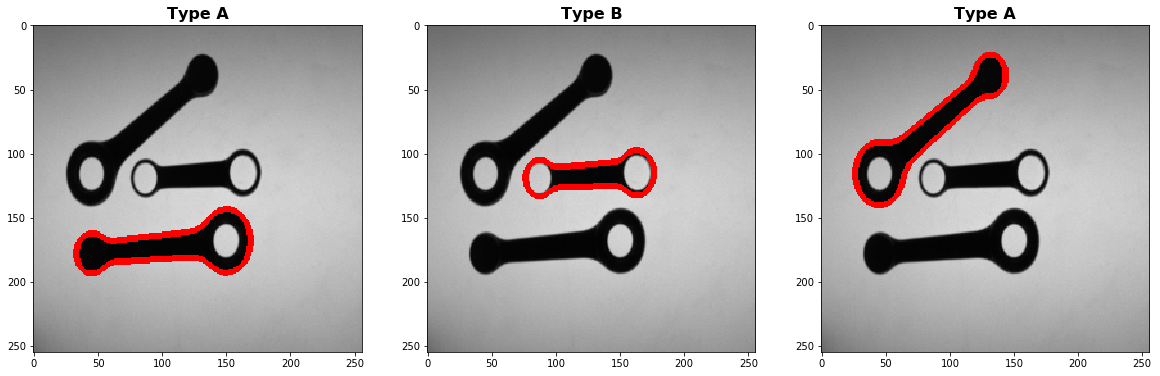

In [78]:
images_features = {
    first_task_img_names[0]: {
        
    },
    first_task_img_names[1]: {
        
    },
    first_task_img_names[2]: {
        
    },
    first_task_img_names[3]: {
        
    },
    first_task_img_names[4]: {
    
    },
    first_task_img_names[5]: {
        
    },
    noisy_img_names[0]: {
        
    },
    noisy_img_names[1]: {
        
    },
    noisy_img_names[2]: {
        
    },
    distractor_img_names[0]: {
        
    },
    distractor_img_names[1]: {
        
    },
    distractor_img_names[2]: {
        
    },
    distractor_img_names[3]: {
        
    }
}

# structure of images_features
#images_features = {
#    'name':{
#          0: {
#              'contour_points':[...],
#              'holes':2,
#               3: {
#                 'contour_points':[...],
#                 'diameter': 15,
#                  ...
#               },
#               'centroid': (x,y)
#               'rect': [..]
#               5: {...}
#          },
#          2:{
#           ...
#          }
#    }
#}


def get_contours_hierarchy(binary_mask):
    """Finds contours and hierarchy of image
    and reshapes hierarchy to ease further processing"""
    im, contours, hierarchy = cv.findContours(binary_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # [Next, Previous, First_Child, Parent] array
    hierarchy = hierarchy.reshape(-1,4)
    return contours, hierarchy

def compute_holes(contours, hierarchy, images_features, name):
    """Iterates over the contour hierarchy
    of each image, detects the top level connected components
    then reiterate to detect children"""
    for contour_number, contour_family in enumerate(hierarchy):
        if contour_family[-1] == -1:
            # key is contour number associated with
            # connected component so that we know
            # where to store the features computed with
            # that same contour, and where to store children
            images_features[name][contour_number] = {}
            if contour_family[2] == -1:
                # then it's a distractor
                images_features[name][contour_number]['distractor'] = True
            else:
                images_features[name][contour_number]['distractor'] = False
                images_features[name][contour_number]['holes'] = 0
            images_features[name][contour_number]['contour_points'] = contours[contour_number]
            # we also compute rectangle already to detect distractors
            rect = cv.minAreaRect(contours[contour_number])
            
            elongatedness = rect[1][0] / rect[1][1]
            if 0.5 <= elongatedness <= 1.5:
                # acceptable delta for circularity with these samples
                images_features[name][contour_number]['distractor'] = True
            else:
                images_features[name][contour_number]['rect'] = rect
    for contour_number, contour_family in enumerate(hierarchy):
        if contour_family[-1] != -1:
            # there's a child, so the parent has a hole
            images_features[name][contour_family[-1]]['holes'] += 1
            # every child/hole itself contains some features
            # so we record the contour number
            images_features[name][contour_family[-1]][contour_number] = {}
            images_features[name][contour_family[-1]][contour_number]['contour_points'] = contours[contour_number]
        
        
def show_type(img_name, img_colored):
    """draws contours and shows type of rod
    a subplot image for each connected component, also
    highlights whether there are distractors"""
    connected_components = len(images_features[img_name].keys())
    fig, axes = plt.subplots(1,connected_components,figsize=[20,10])
    i = 0
    for cc_number, cc_features in images_features[img_name].items():
        tmp = img_colored.copy()
        cv.drawContours(tmp, [cc_features['contour_points']], 0, (255,0,0), 3)
        axes[i].imshow(tmp)
        title = ''
        if cc_features['distractor']:
            title = 'Distractor'
        elif cc_features['holes'] == 1:
            title = 'Type A'
        elif cc_features['holes'] == 2:
            title = 'Type B'
        else:
            title = 'Type not detected'
        axes[i].set_title(title, fontdict={
            'fontsize': 16,
            'fontweight' : 'bold'})
        i += 1
    plt.show()
    
### standard rods ###
contours1, hierarchy1 = get_contours_hierarchy(th1)
contours2, hierarchy2 = get_contours_hierarchy(th2)
contours3, hierarchy3 = get_contours_hierarchy(th3)
contours4, hierarchy4 = get_contours_hierarchy(th4)
contours5, hierarchy5 = get_contours_hierarchy(th5)
contours6, hierarchy6 = get_contours_hierarchy(th6)

compute_holes(contours1, hierarchy1, images_features, first_task_img_names[0])
compute_holes(contours2, hierarchy2, images_features, first_task_img_names[1])
compute_holes(contours3, hierarchy3, images_features, first_task_img_names[2])
compute_holes(contours4, hierarchy4, images_features, first_task_img_names[3])
compute_holes(contours5, hierarchy5, images_features, first_task_img_names[4])
compute_holes(contours6, hierarchy6, images_features, first_task_img_names[5])

### noisy rods ###
contours_noisy1, hierarchy_noisy1 = get_contours_hierarchy(denoised1)
contours_noisy2, hierarchy_noisy2 = get_contours_hierarchy(denoised2)
contours_noisy3, hierarchy_noisy3 = get_contours_hierarchy(denoised3)

compute_holes(contours_noisy1, hierarchy_noisy1, images_features, noisy_img_names[0])
compute_holes(contours_noisy2, hierarchy_noisy2, images_features, noisy_img_names[1])
compute_holes(contours_noisy3, hierarchy_noisy3, images_features, noisy_img_names[2])

### distracted rods ###
contours_dist1, hierarchy_dist1 = get_contours_hierarchy(distractor1)
contours_dist2, hierarchy_dist2 = get_contours_hierarchy(distractor2)
contours_dist3, hierarchy_dist3 = get_contours_hierarchy(distractor3)
contours_dist4, hierarchy_dist4 = get_contours_hierarchy(distractor4)

compute_holes(contours_dist1, hierarchy_dist1, images_features, distractor_img_names[0])
compute_holes(contours_dist2, hierarchy_dist2, images_features, distractor_img_names[1])
compute_holes(contours_dist3, hierarchy_dist3, images_features, distractor_img_names[2])
compute_holes(contours_dist4, hierarchy_dist4, images_features, distractor_img_names[3])

show_type(first_task_img_names[0], first_task_img_colored[0])
show_type(first_task_img_names[1], first_task_img_colored[1])
show_type(first_task_img_names[2], first_task_img_colored[2])


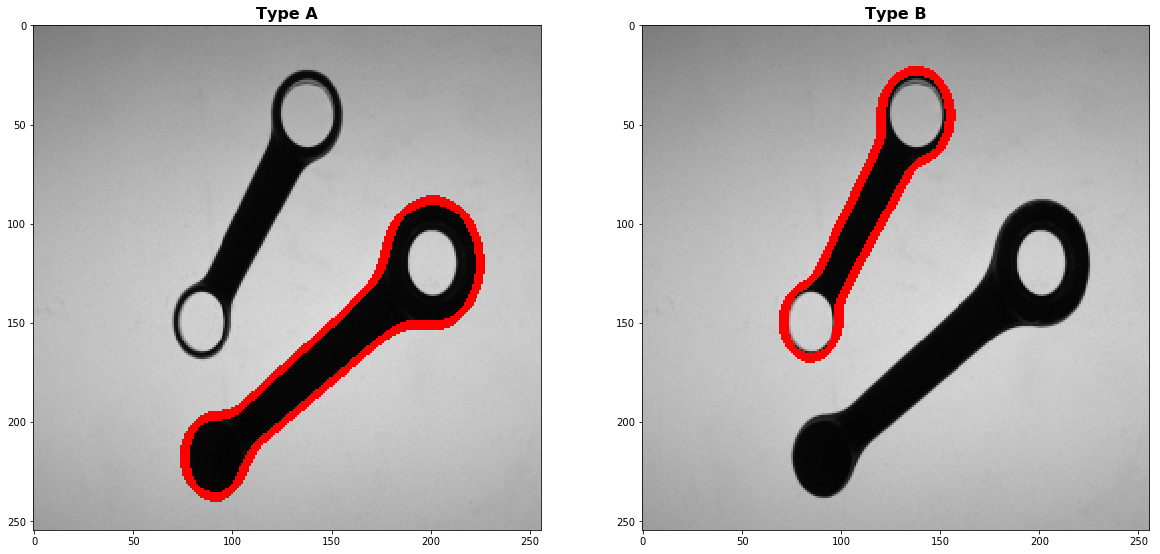

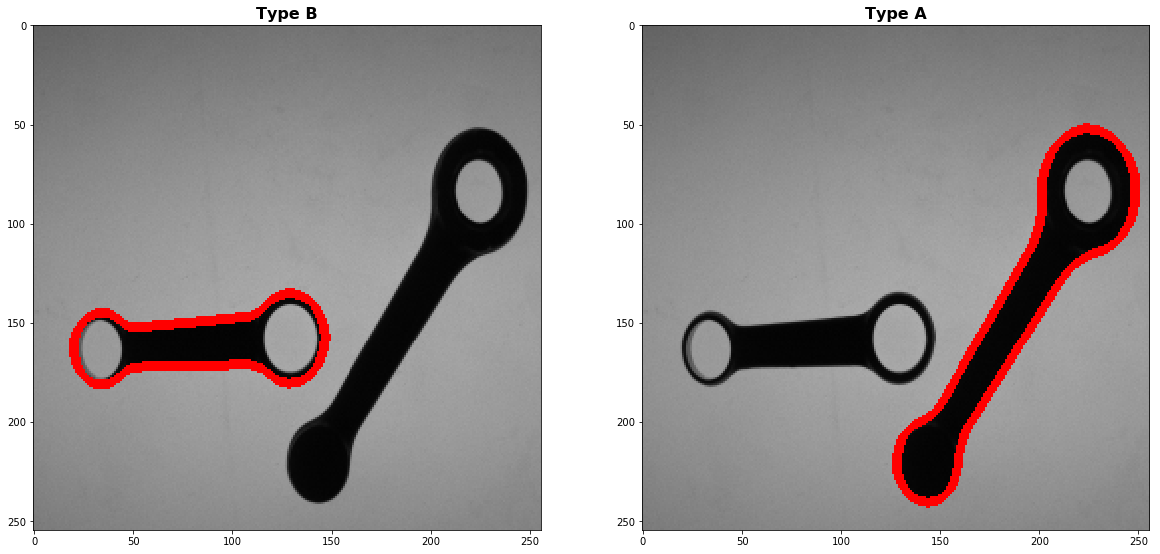

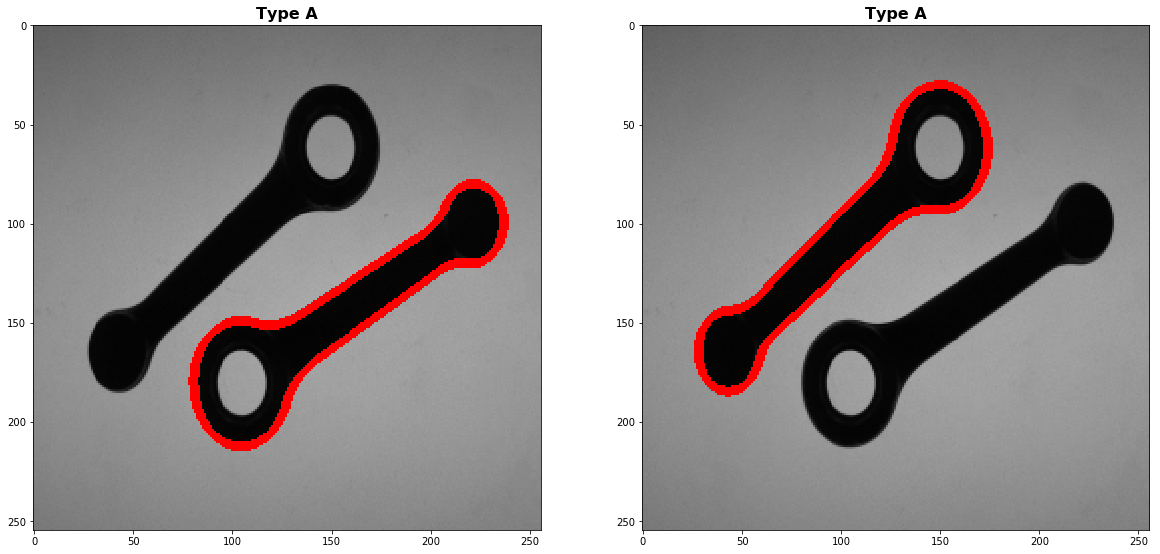

In [11]:
show_type(first_task_img_names[3], first_task_img_colored[3])
show_type(first_task_img_names[4], first_task_img_colored[4])
show_type(first_task_img_names[5], first_task_img_colored[5])

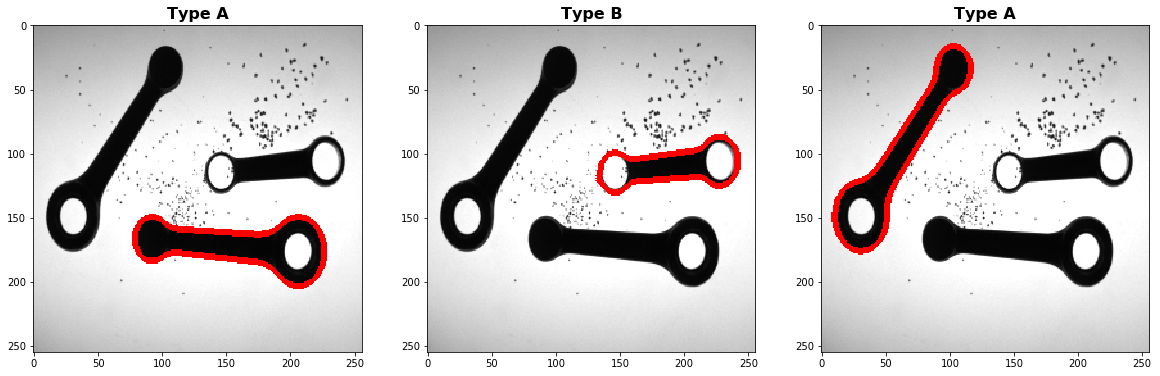

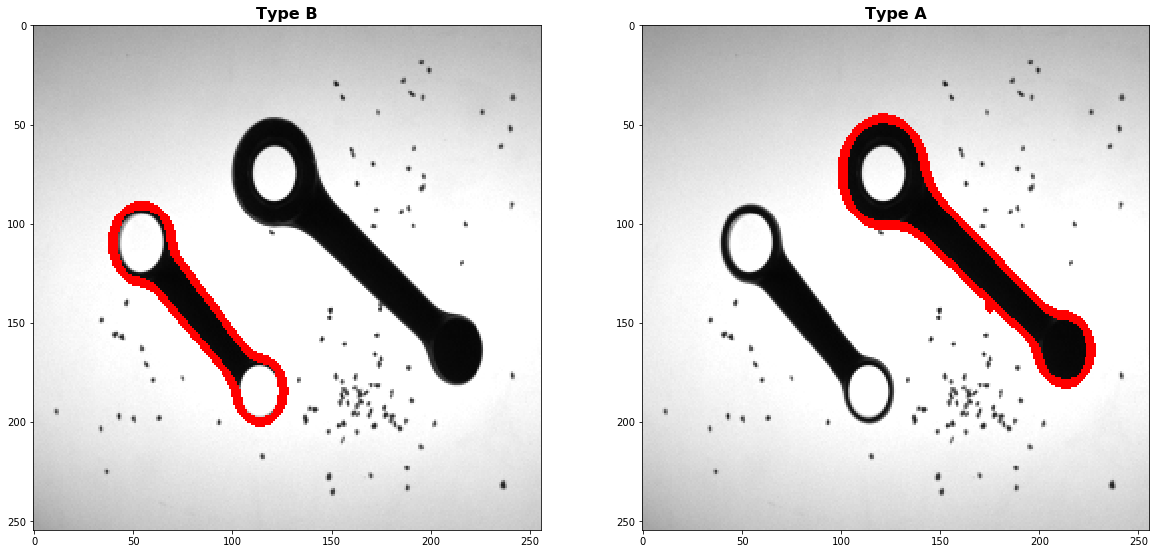

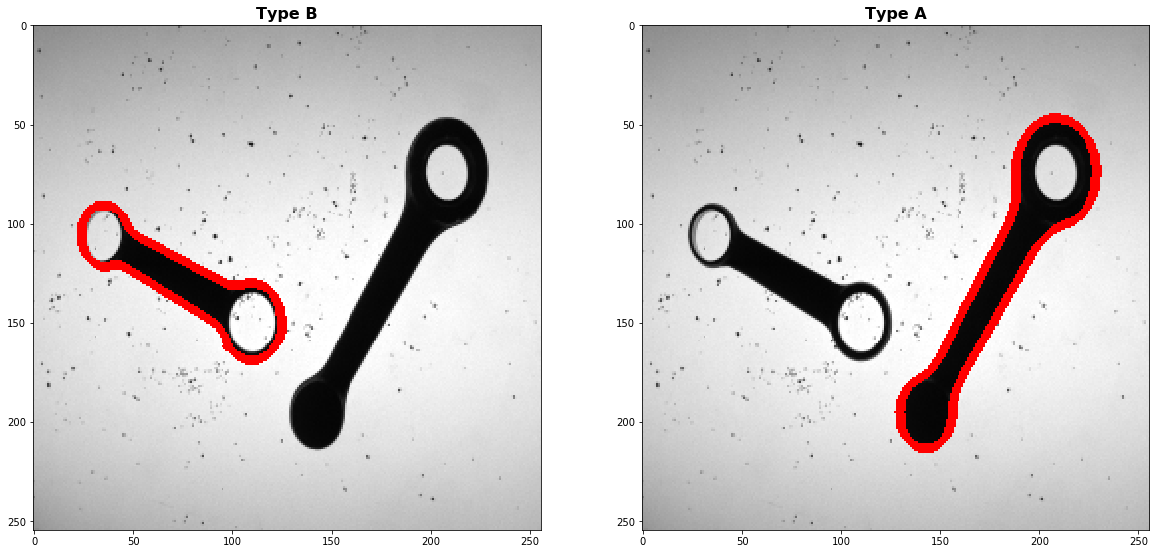

In [29]:
show_type(noisy_img_names[0], noisy_img_colored[0])
show_type(noisy_img_names[1], noisy_img_colored[1])
show_type(noisy_img_names[2], noisy_img_colored[2])

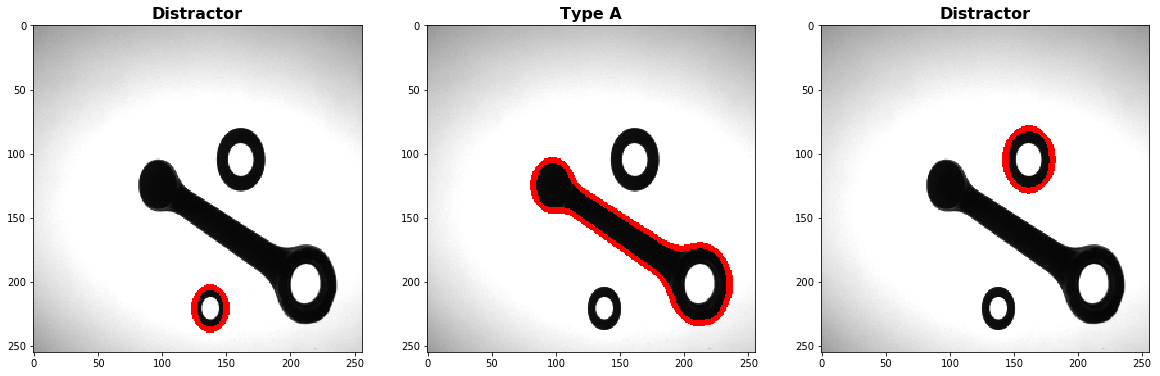

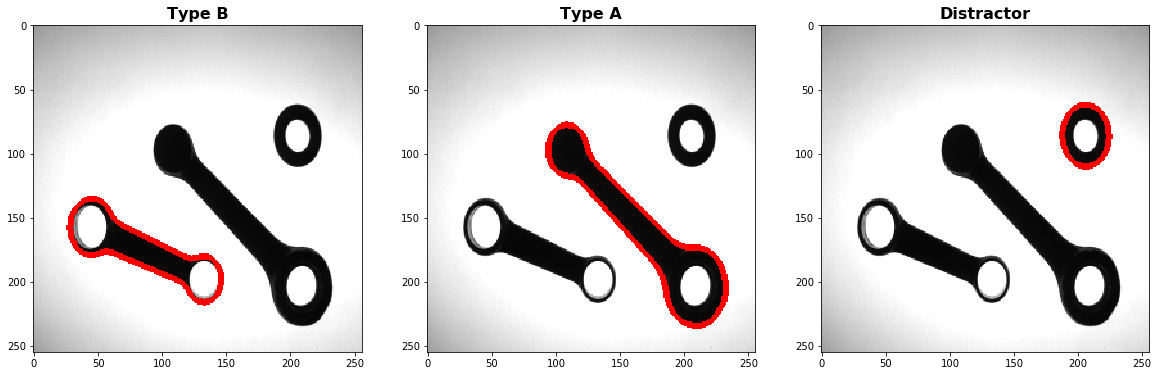

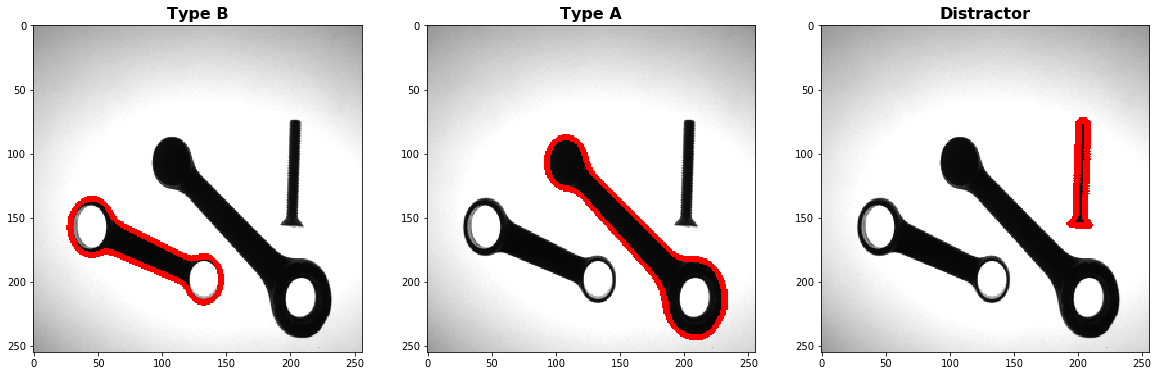

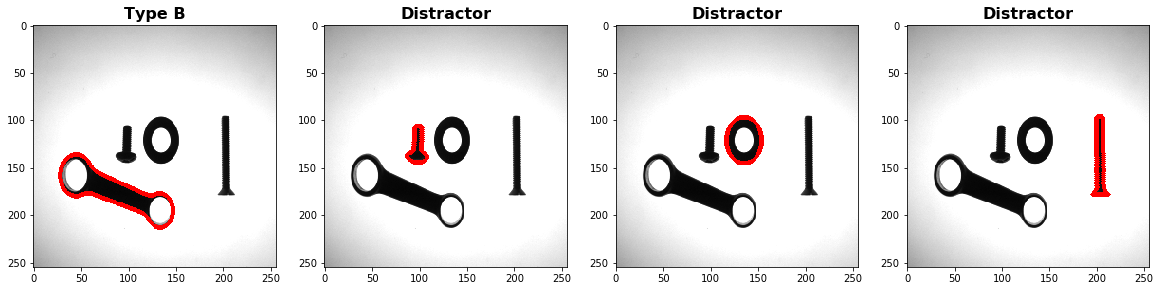

In [28]:
show_type(distractor_img_names[0], distractor_img_colored[0])
show_type(distractor_img_names[1], distractor_img_colored[1])
show_type(distractor_img_names[2], distractor_img_colored[2])
show_type(distractor_img_names[3], distractor_img_colored[3])

Next, we compute features for each contour, differentiating between inner and outer contours: the former are holes, so we only need the center and the diameter of those, while the latter are the connected components borders, so we need the barycenter, the orientation (found through the fitted ellipse), the width and height (found through the fitted rectangle). The barycenter of each contour is computed with moments.
Features are not computed for distractor objects.

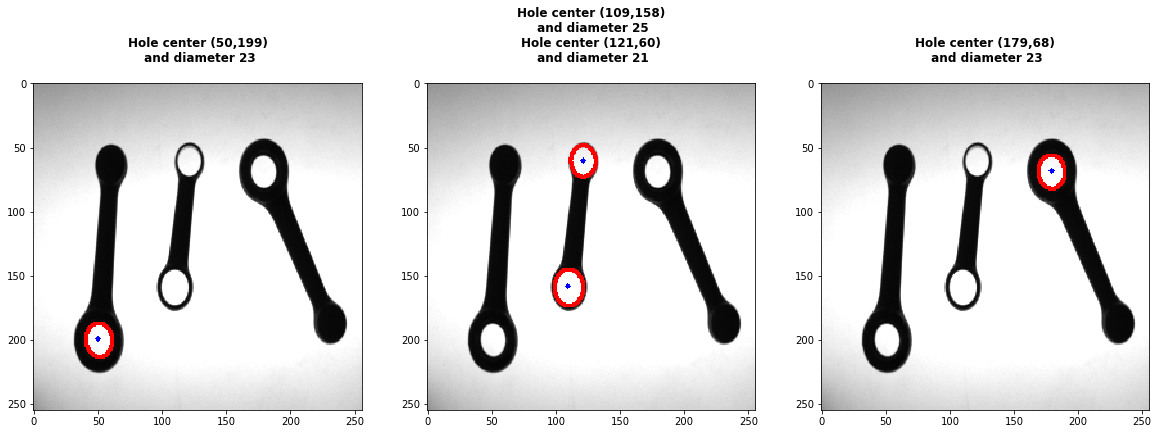

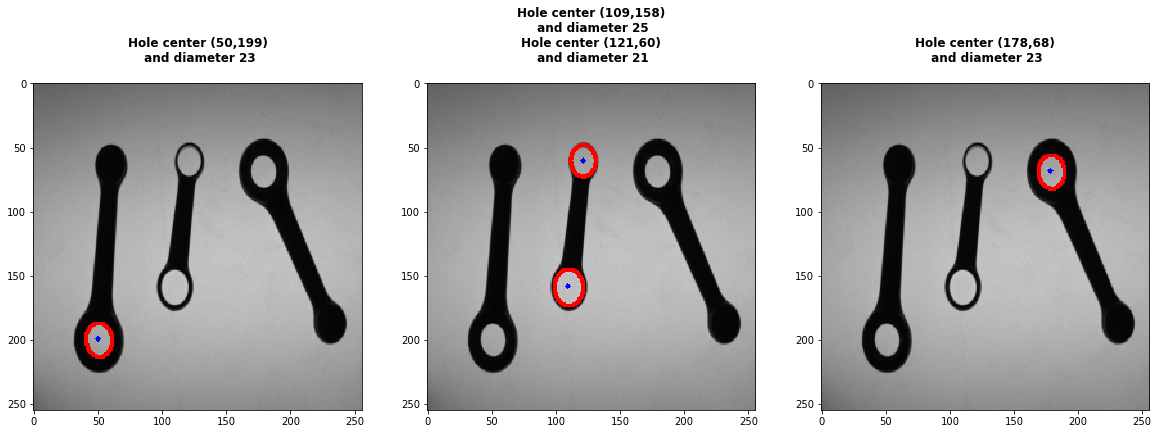

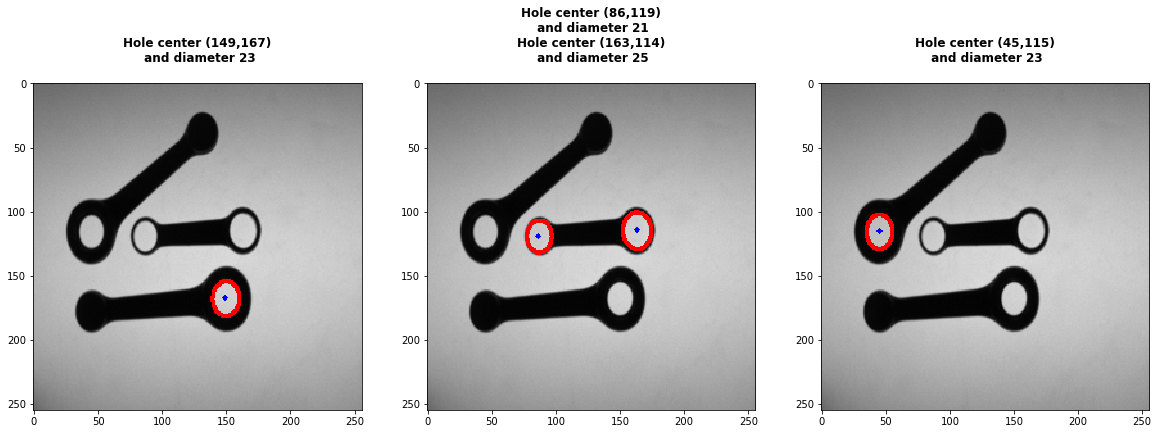

In [135]:
def compute_features(img_name, images_features):
    """Computes features for every rod in the image."""
    for k, v in images_features[img_name].items():
        
        if v['distractor']:
            # don't even attempt
            # to compute features
            continue
        moments = cv.moments(v['contour_points'])
        rect = cv.minAreaRect(v['contour_points'])
        v['area'] = moments['m00']
        v['centroid'] = (int(moments['m10'] / moments['m00']),
                                                    int(moments['m01'] / moments['m00']))
        
        ellipse = cv.fitEllipse(v['contour_points'])
        _,_,angle = ellipse
        angle = int(angle)
        if 0 <= angle <= 90:
            angle = 90 - angle
        else:
            # angle is between 90 and 180, since it's modulo pi
            angle = 270 - angle
        v['orientation'] = angle
        v['rect'] = rect
        height = max(int(rect[1][0]), int(rect[1][1]))
        width = min(int(rect[1][0]), int(rect[1][1]))
        v['width'] = width
        v['height'] = height
        point = barycentre_width(v['contour_points'], angle, v['centroid'])
        v['barycentre_width'] = int(np.linalg.norm(v['centroid'] - point))
        if type(k) == int and type(v) == dict:
            for child_k, child_v in v.items():
                if type(child_k) == int and type(child_v) == dict:
                    moments = cv.moments(child_v['contour_points'])
                    rect = cv.minAreaRect(child_v['contour_points'])
                    
                    images_features[img_name][k][child_k]['area'] = moments['m00']
                    images_features[img_name][k][child_k]['centroid'] = (int(moments['m10'] / moments['m00']),
                                                                int(moments['m01'] / moments['m00']))
                    images_features[img_name][k][child_k]['rect'] = rect
                    images_features[img_name][k][child_k]['diameter'] = int(np.sqrt(
                        (images_features[img_name][k][child_k]['area']*4) / np.pi))
                    

def barycentre_width(contour,angle, barycentre):
    """Finds point at the intersection between minor 
    axis and outer contour. Uses line equation with no 
    known term c since it is a line passing through
    the barycentre (just the coordinates are shifted)
    (i - ib) / -(j - jb) = coefficient"""
    coefficient = np.tan(np.deg2rad((angle + 90) % 180))
    tmp_difference = 10000
    points = []
    # find best point, will be at the tail end of list
    for p in range(np.array(contour).shape[0]):
        if barycentre[0] - contour[p,0,0] != 0 and np.abs(
            ((contour[p,0,1] - barycentre[1]) / (barycentre[0] - contour[p,0,0])) - coefficient) < tmp_difference:
            tmp_difference = np.abs(((barycentre[1]-contour[p,0,1]) / (contour[p,0,0] - barycentre[0])) - coefficient)
            points.append((contour[p,0,0], contour[p,0,1]))

    return np.array(points[-1])
    
def draw_holes(img_name, img_colored):
    """draws holes of each connected component
    shows their center and writes coordinates
    and diameter in the title"""
    connected_components = len(images_features[img_name].keys())
    fig, axes = plt.subplots(1,connected_components,figsize=[20,10])
    i = 0
    for cc_number, cc_features in images_features[img_name].items():
        tmp = img_colored.copy()
        if cc_features['distractor']:
            cv.drawContours(tmp,[cc_features['contour_points']],0,(255,0,0),2)
            axes[i].imshow(tmp)
            axes[i].set_title('Distractor')
            i+=1
            continue
        
        
        title = ''
        for cc_feature_key, cc_feature_val in cc_features.items():
            if type(cc_feature_key) == int and type(cc_feature_val) == dict:
                title += 'Hole center ({},{})\n and diameter {}\n'
                cv.drawContours(tmp,[cc_feature_val['contour_points']],0,(255,0,0),2)
                cv.circle(tmp, (cc_feature_val['centroid'][0], cc_feature_val['centroid'][1]), 
                          2, (0,0,255), cv.FILLED)
                title = title.format(cc_feature_val['centroid'][0],cc_feature_val['centroid'][1], cc_feature_val['diameter'])

        axes[i].imshow(tmp)
        axes[i].set_title(title, fontdict={'fontsize': 12, 'fontweight' : 'bold'})
        i+=1
    plt.show()


compute_features(first_task_img_names[0], images_features)
compute_features(first_task_img_names[1], images_features)
compute_features(first_task_img_names[2], images_features)
compute_features(first_task_img_names[3], images_features)
compute_features(first_task_img_names[4], images_features)
compute_features(first_task_img_names[5], images_features)

compute_features(noisy_img_names[0], images_features)
compute_features(noisy_img_names[1], images_features)
compute_features(noisy_img_names[2], images_features)

compute_features(distractor_img_names[0], images_features)
compute_features(distractor_img_names[1], images_features)
compute_features(distractor_img_names[2], images_features)
compute_features(distractor_img_names[3], images_features)

draw_holes(first_task_img_names[0], first_task_img_colored[0])
draw_holes(first_task_img_names[1], first_task_img_colored[1])
draw_holes(first_task_img_names[2], first_task_img_colored[2])

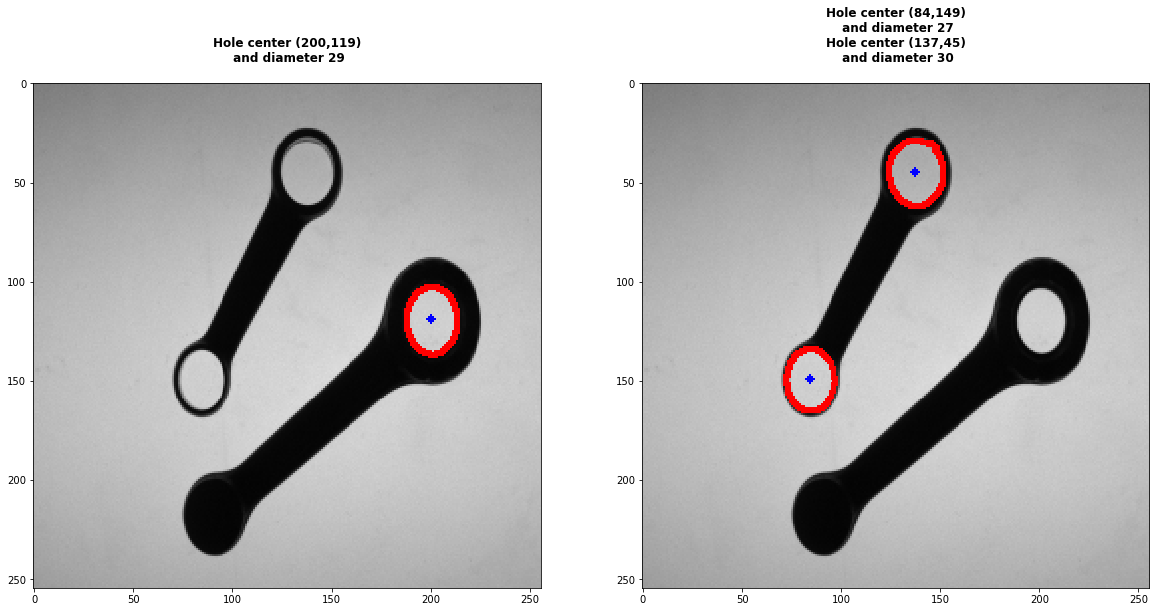

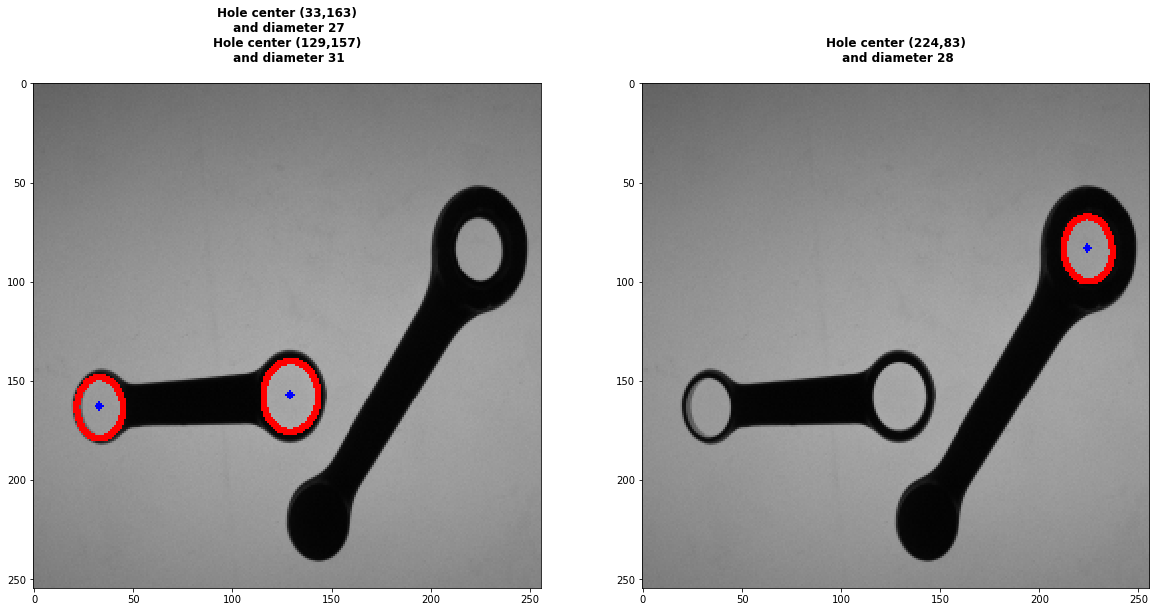

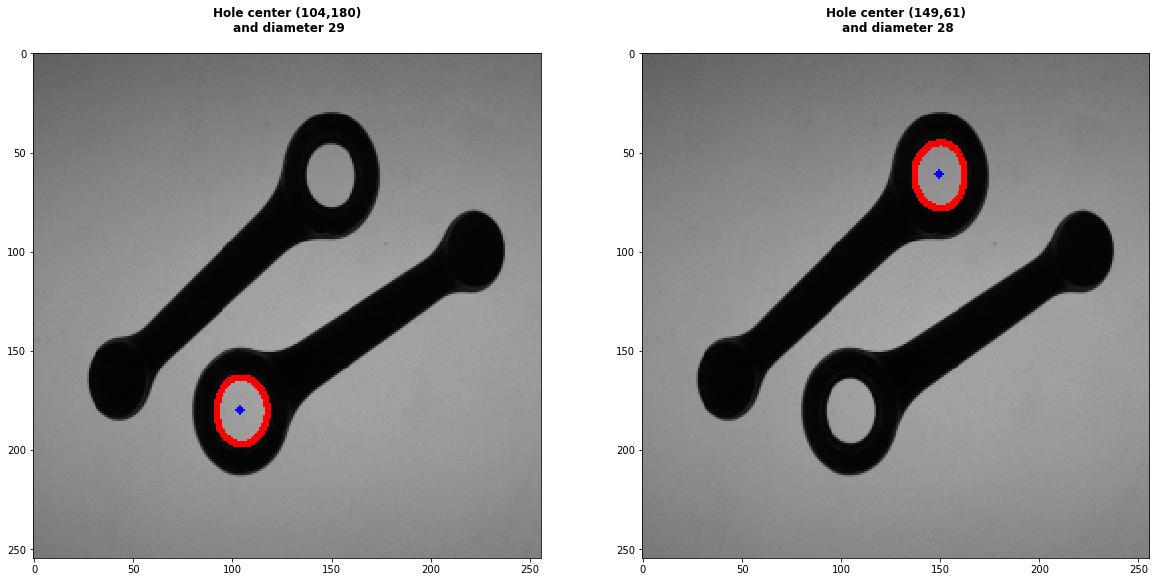

In [109]:
draw_holes(first_task_img_names[3], first_task_img_colored[3])
draw_holes(first_task_img_names[4], first_task_img_colored[4])
draw_holes(first_task_img_names[5], first_task_img_colored[5])

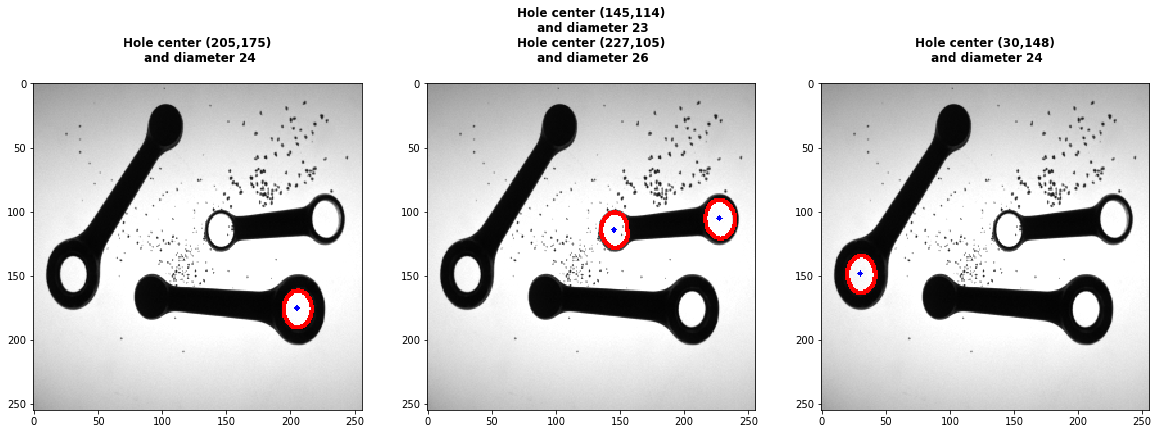

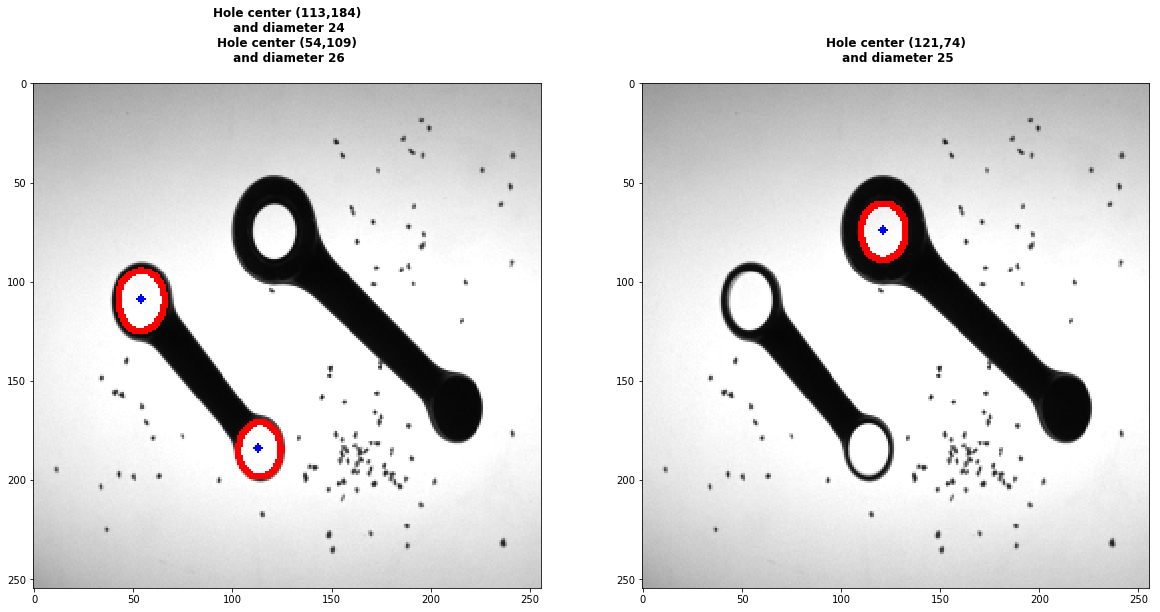

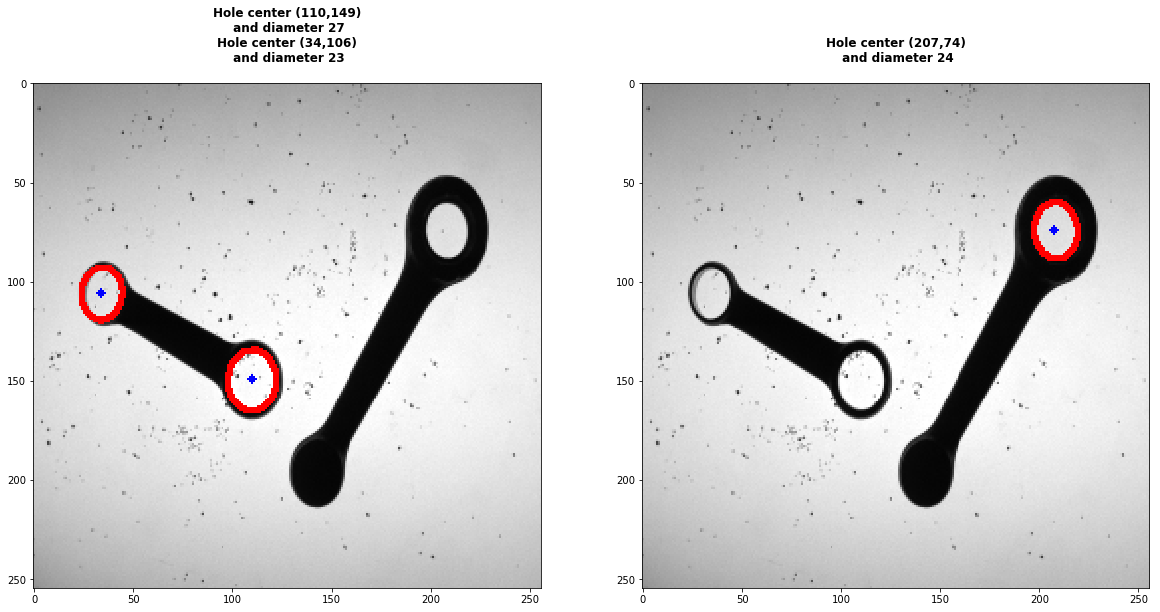

In [27]:
draw_holes(noisy_img_names[0], noisy_img_colored[0])
draw_holes(noisy_img_names[1], noisy_img_colored[1])
draw_holes(noisy_img_names[2], noisy_img_colored[2])

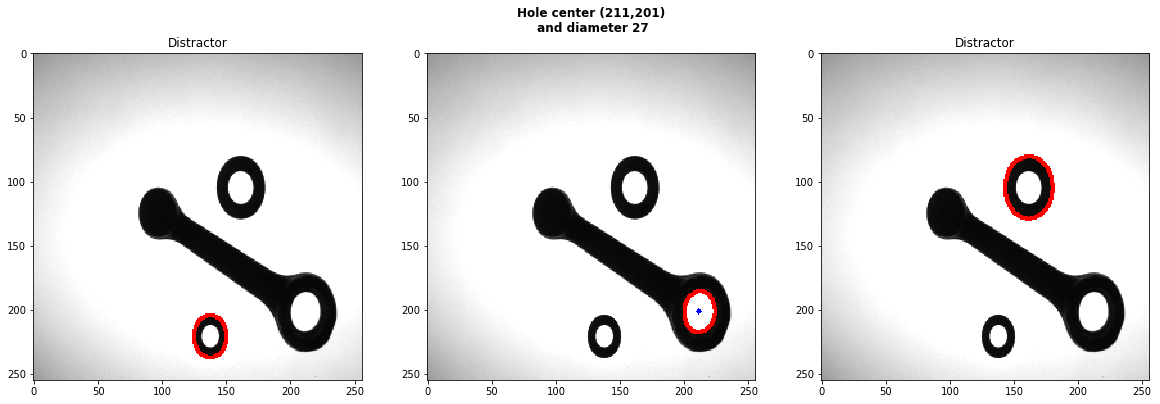

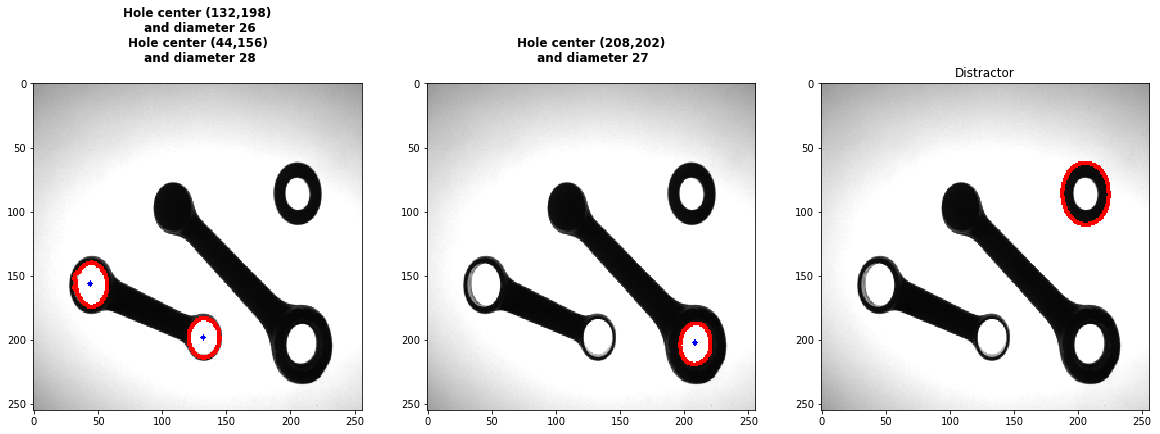

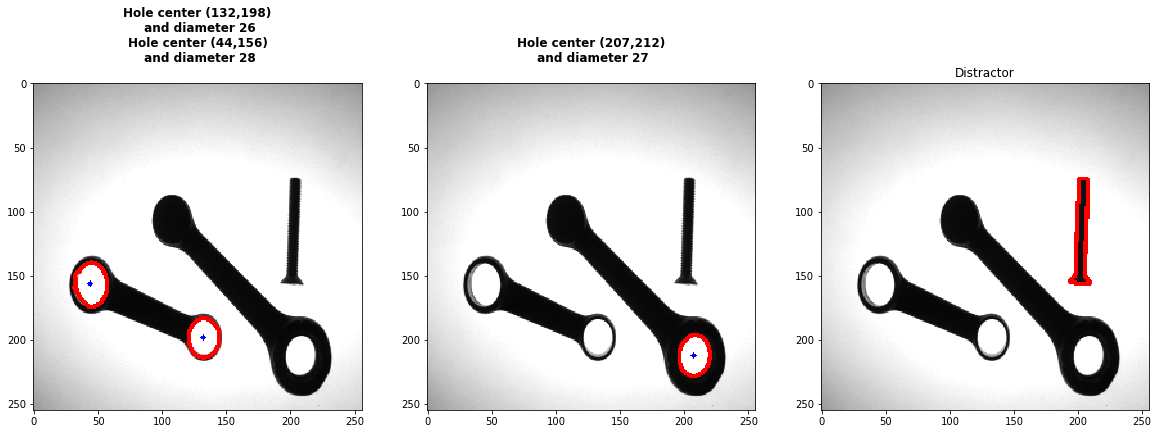

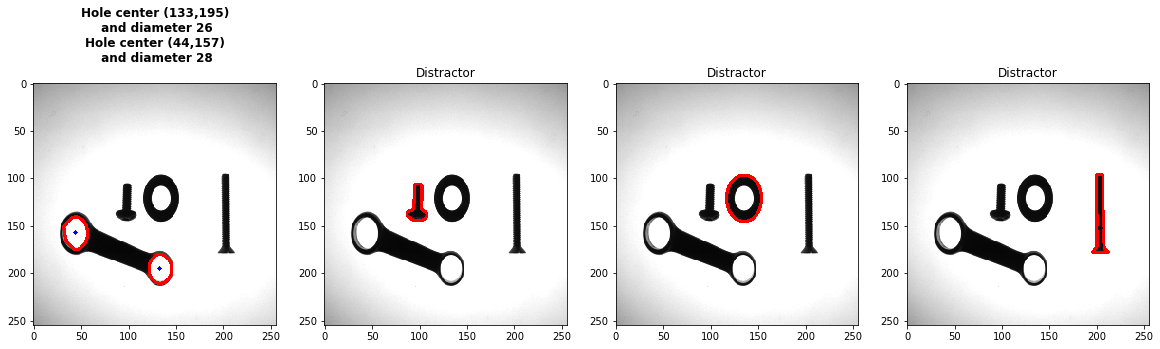

In [26]:
draw_holes(distractor_img_names[0], distractor_img_colored[0])
draw_holes(distractor_img_names[1], distractor_img_colored[1])
draw_holes(distractor_img_names[2], distractor_img_colored[2])
draw_holes(distractor_img_names[3], distractor_img_colored[3])

We define height the greater dimension of the rod's enclosing rectangle, width the smaller. The orientation computed before through the ellipse needs to be converted to counterclockwise measurement (ellipse orientation angles are measured as if they were clockwise, non-negative, and w.r.t to the vertical axis).

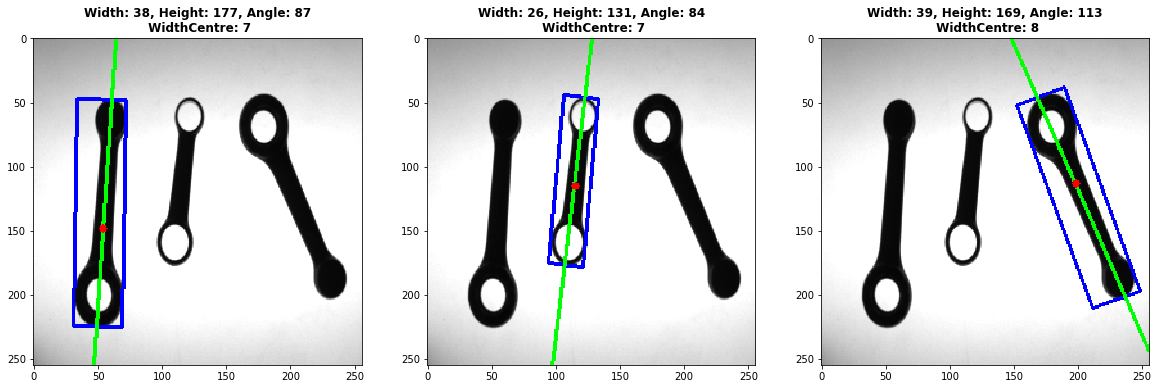

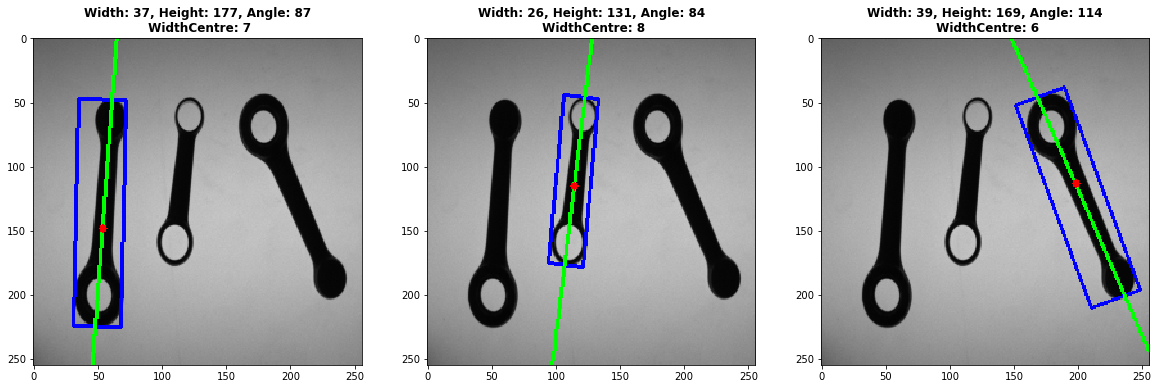

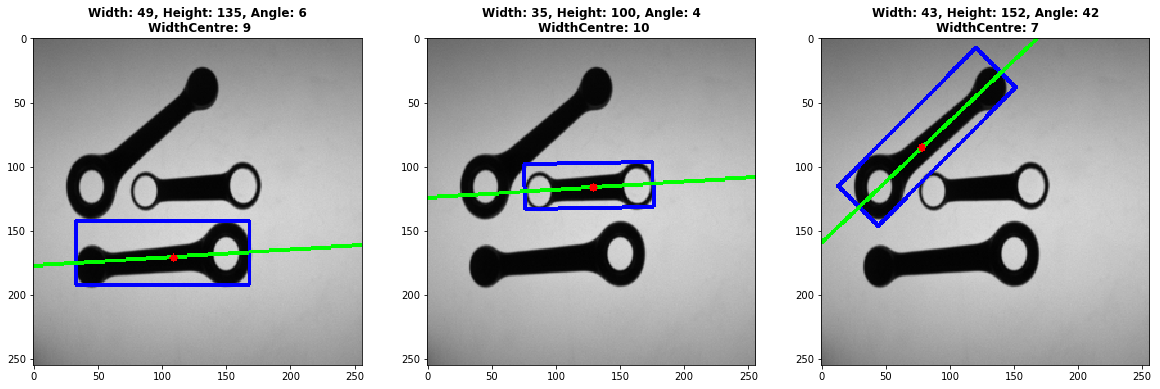

In [130]:
def draw_mer(img_name, img_colored):
    """draws bounding rectangle, line through
    barycentre and barycentre itself, one sub-image per rod"""
    connected_components = len(images_features[img_name].keys())
    holes = images_features[img_name]
    fig, axes = plt.subplots(1,connected_components,figsize=[20,10])
    i = 0
    for cc_number, cc_features in images_features[img_name].items():
        tmp = img_colored.copy()
        if cc_features['distractor']:
            axes[i].imshow(tmp)
            axes[i].set_title('Distractor')
            i+=1
            continue
        
        box = cv.boxPoints(cc_features['rect'])
        box = np.int0(box)
        cv.drawContours(tmp,[box],0,(0,0,255),2)
        
        rows,cols = tmp.shape[:2]
        
        # vx, vy is a collinear vector to the line, x,y point on the line
        [vx,vy,x,y] = cv.fitLine(cc_features['contour_points'], cv.DIST_L2,0,0.01,0.01)
        lefty = int((-x*vy/vx) + y)
        righty = int(((cols-x)*vy/vx)+y)
        cv.line(tmp,(cols-1,righty),(0,lefty),(0,255,0),2)
        
        cv.circle(tmp, (cc_features['centroid'][0], cc_features['centroid'][1]), 3, (255,0,0), cv.FILLED)
        axes[i].imshow(tmp)
        axes[i].set_title('Width: {}, Height: {}, Angle: {}\n WidthCentre: {}'.format(cc_features['width'],
                                                                   cc_features['height'],
                                                                   cc_features['orientation'],
                                                                   cc_features['barycentre_width']),
                                                                   fontdict={'fontsize': 12, 'fontweight' : 'bold'})
        i+=1
    plt.show()

draw_mer(first_task_img_names[0], first_task_img_colored[0])
draw_mer(first_task_img_names[1], first_task_img_colored[1])
draw_mer(first_task_img_names[2], first_task_img_colored[2])

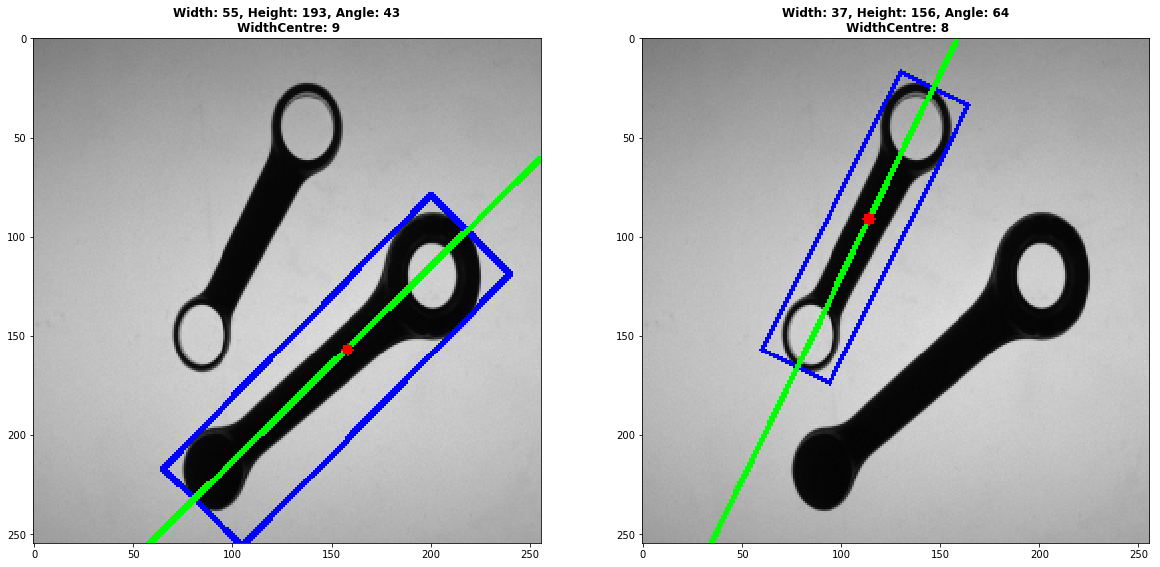

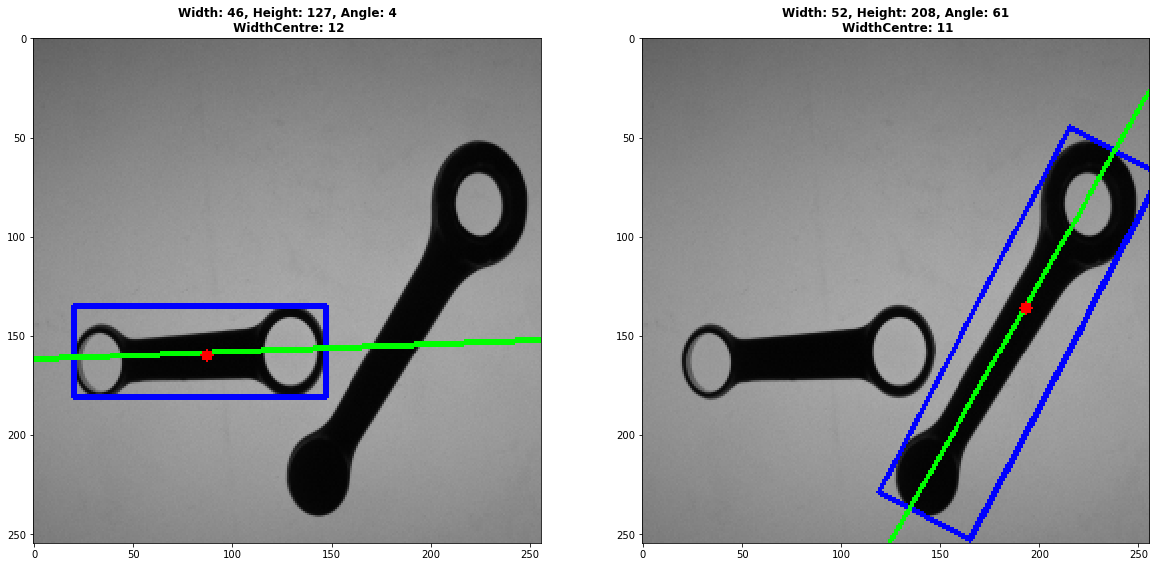

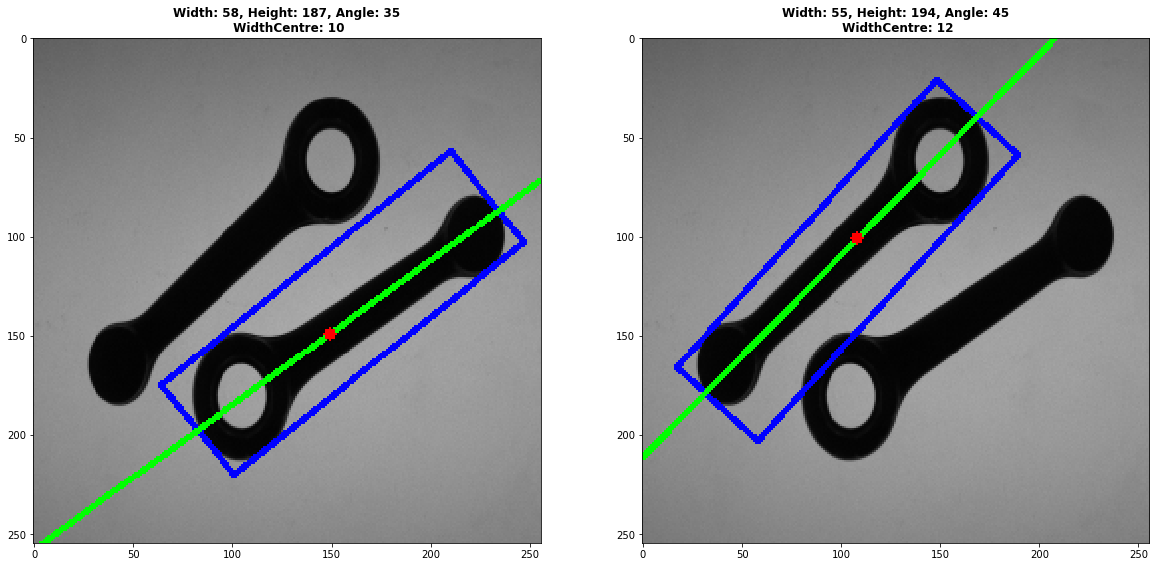

In [131]:
draw_mer(first_task_img_names[3], first_task_img_colored[3])
draw_mer(first_task_img_names[4], first_task_img_colored[4])
draw_mer(first_task_img_names[5], first_task_img_colored[5])

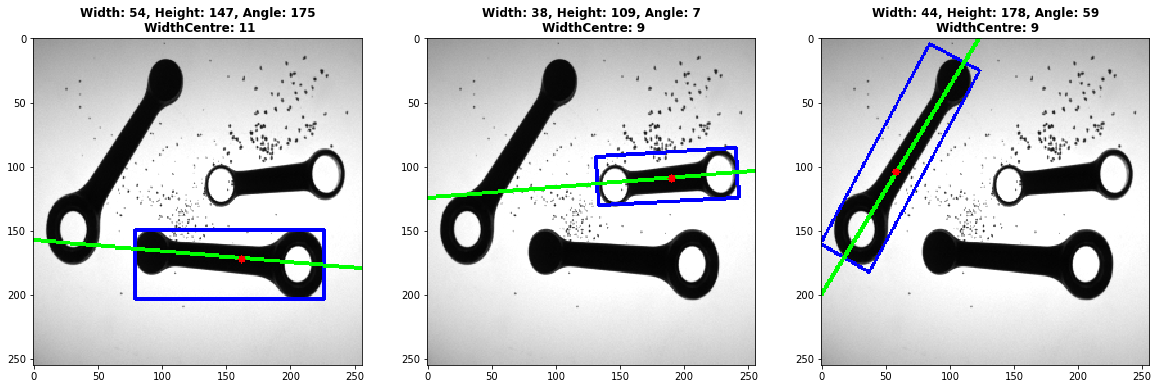

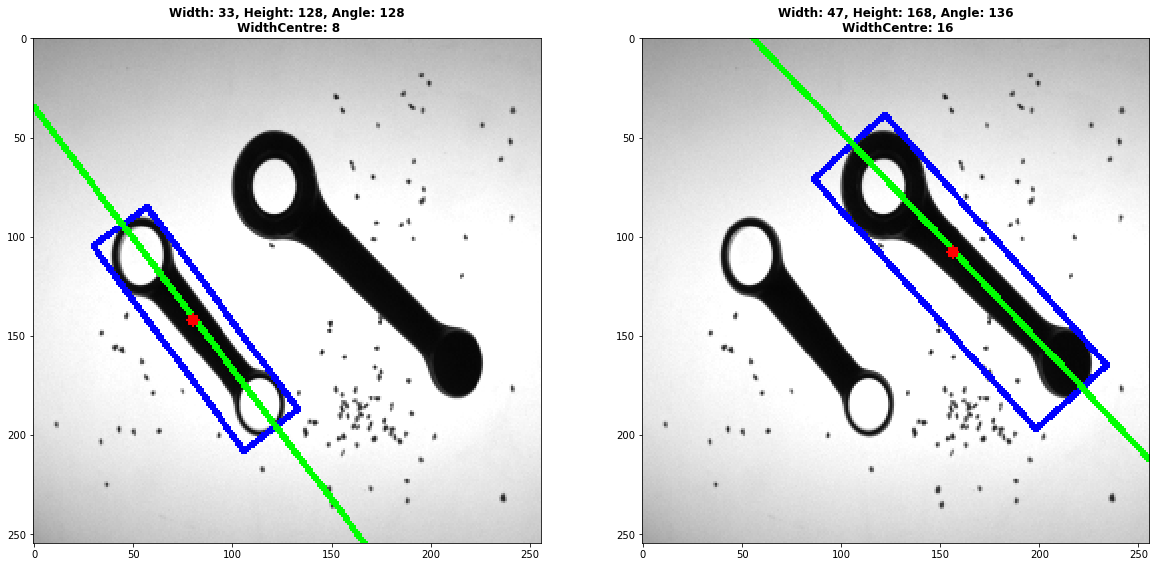

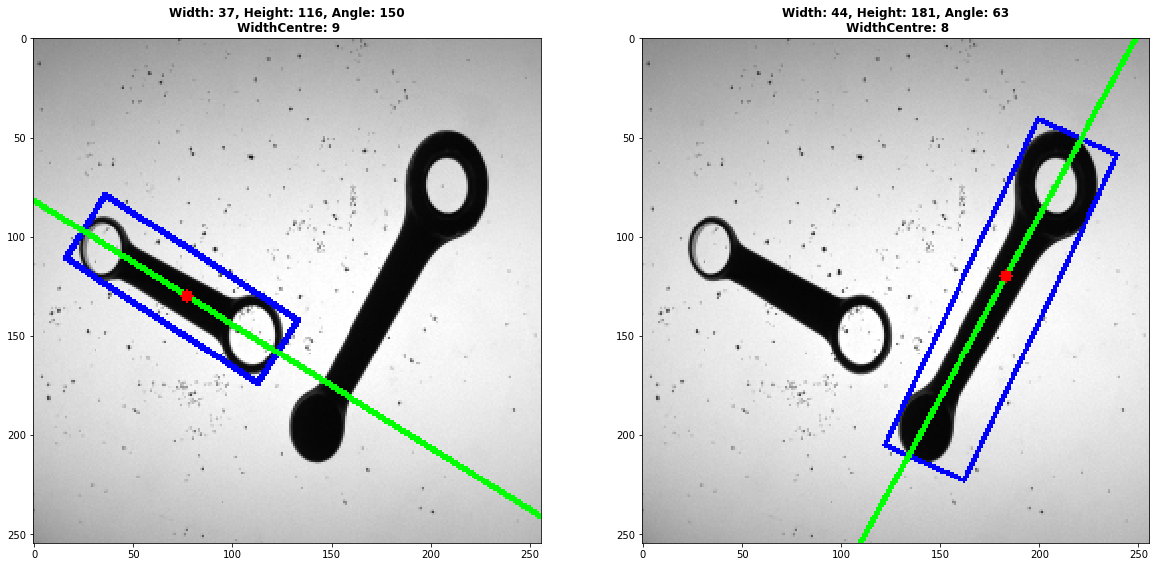

In [132]:
draw_mer(noisy_img_names[0], noisy_img_colored[0])
draw_mer(noisy_img_names[1], noisy_img_colored[1])
draw_mer(noisy_img_names[2], noisy_img_colored[2])

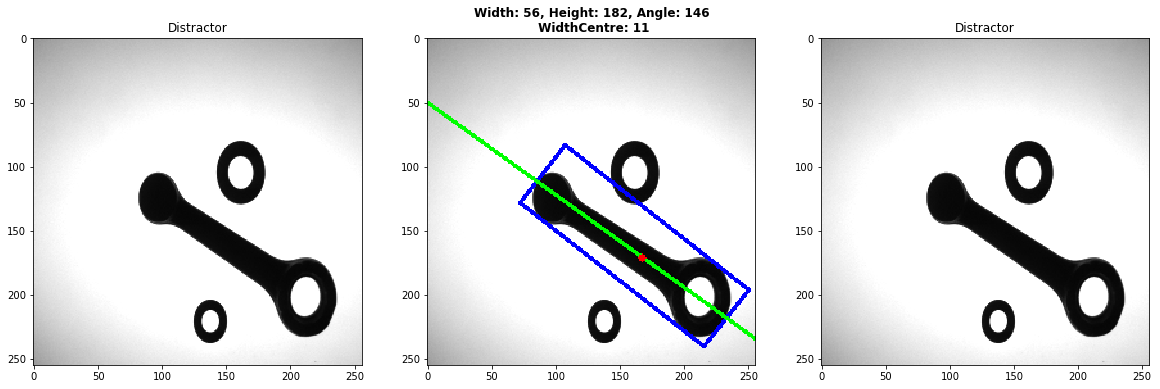

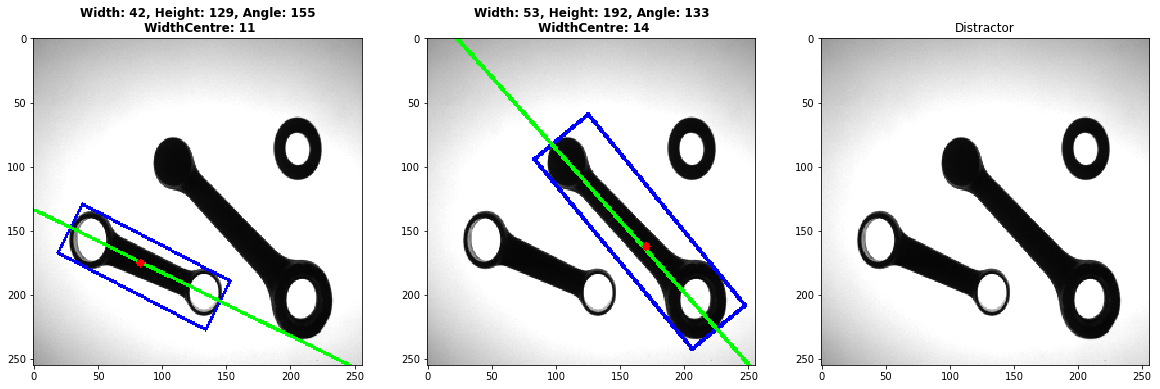

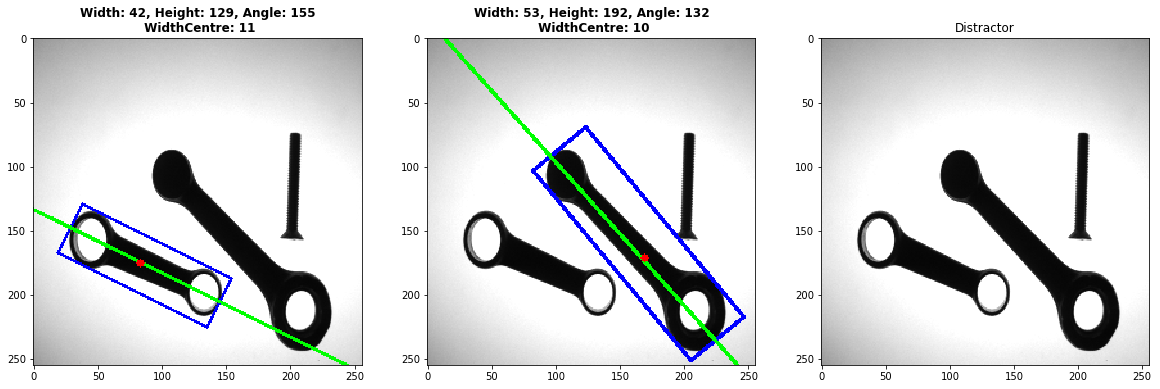

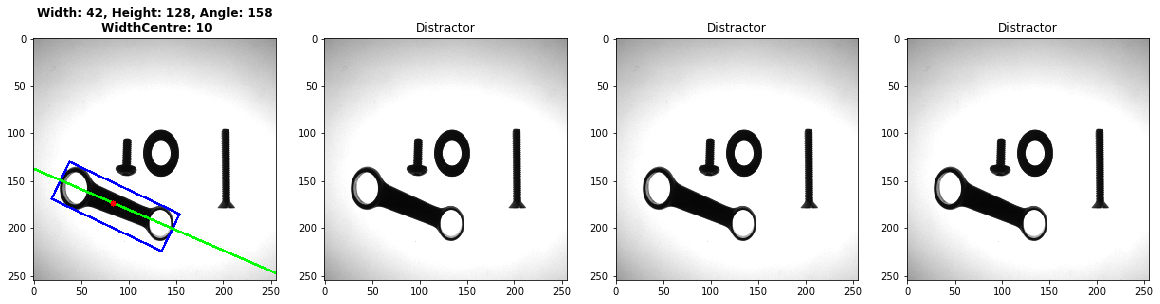

In [133]:
draw_mer(distractor_img_names[0], distractor_img_colored[0])
draw_mer(distractor_img_names[1], distractor_img_colored[1])
draw_mer(distractor_img_names[2], distractor_img_colored[2])
draw_mer(distractor_img_names[3], distractor_img_colored[3])